# Imports Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score

# Load Data

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#EDA

In [ ]:
married = df[df['ever_married'] == 'Yes'].groupby(['stroke'])['ever_married'].count().reset_index()
unmarried = df[df['ever_married'] == 'No'].groupby(['stroke'])['ever_married'].count().reset_index()

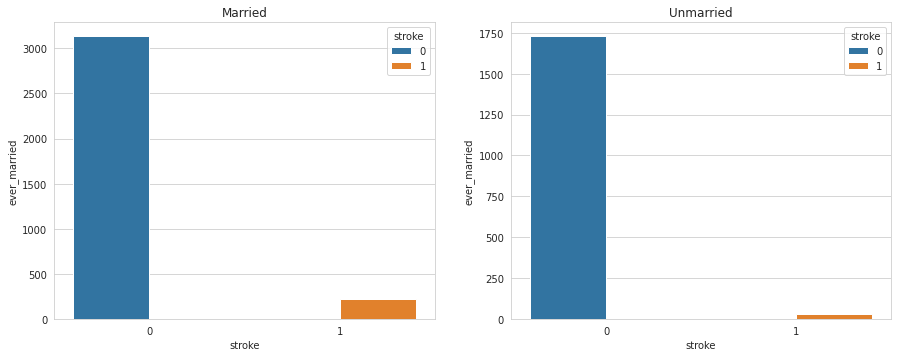

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
plt.title('Married')
sns.barplot(x='stroke', y='ever_married', hue='stroke', data=married)
plt.subplot(2,2,2)
plt.title('Unmarried')
sns.barplot(x='stroke', y='ever_married', hue='stroke', data=unmarried)
plt.show()

<Figure size 720x360 with 0 Axes>

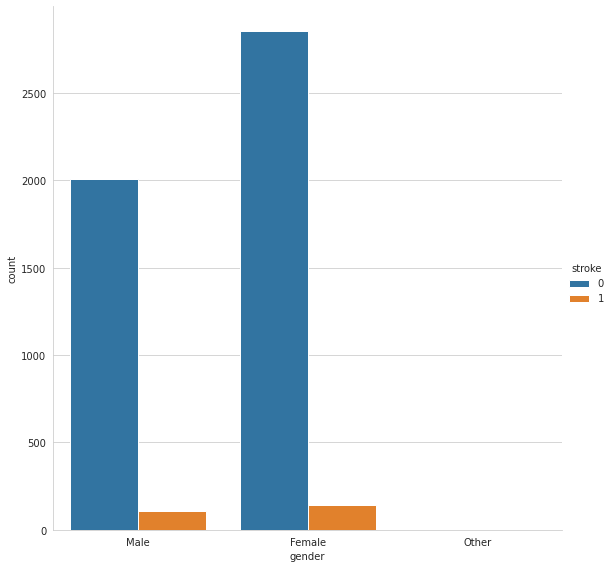

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(data=df, 
            x="gender", hue="stroke",  
            kind='count', height=8)

In [ ]:
urban = df[df['Residence_type'] == 'Urban'].groupby(['stroke'])['Residence_type'].count().reset_index()
rural = df[df['Residence_type'] == 'Rural'].groupby(['stroke'])['Residence_type'].count().reset_index()

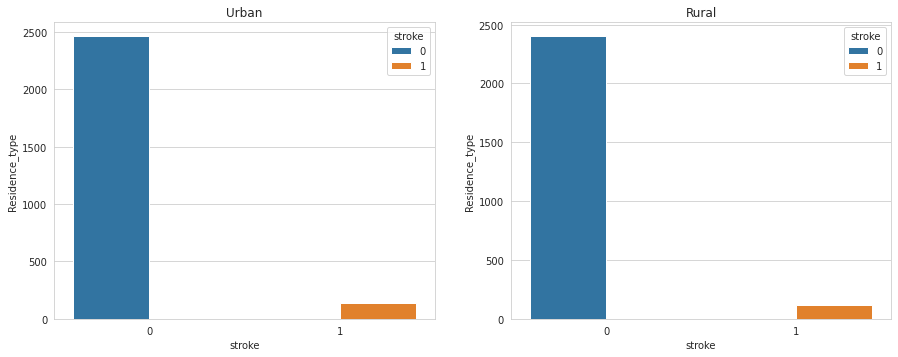

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
plt.title('Urban')
sns.barplot(x='stroke', y='Residence_type', hue='stroke', data=urban)
plt.subplot(2,2,2)
plt.title('Rural')
sns.barplot(x='stroke', y='Residence_type', hue='stroke', data=rural)
plt.show()

In [ ]:
private = df[df['work_type'] == 'Private'].groupby(['stroke'])['work_type'].count().reset_index()
self_employed = df[df['work_type'] == 'Self-employed'].groupby(['stroke'])['work_type'].count().reset_index()
govt_job = df[df['work_type'] == 'Govt_job'].groupby(['stroke'])['work_type'].count().reset_index()
children = df[df['work_type'] == 'children'].groupby(['stroke'])['work_type'].count().reset_index()
never_worked = df[df['work_type'] == 'Never_worked'].groupby(['stroke'])['work_type'].count().reset_index()

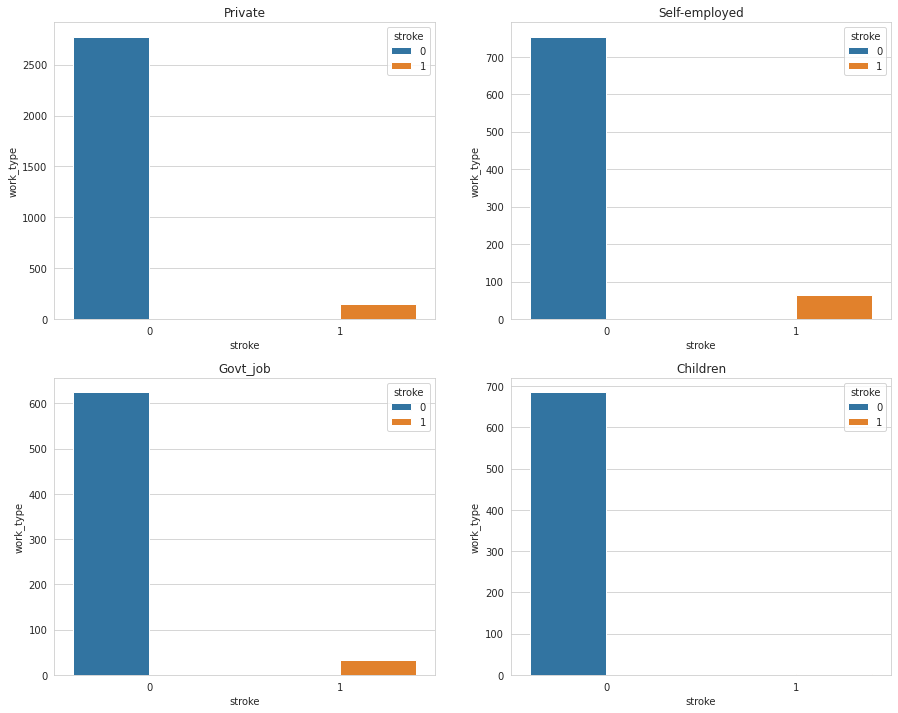

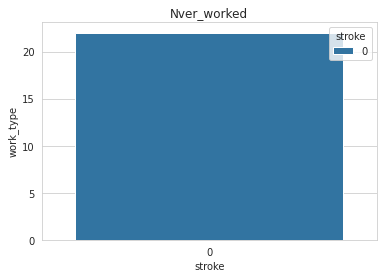

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
plt.title('Private')
sns.barplot(x='stroke', y='work_type', hue='stroke', data=private)
plt.subplot(2,2,2)
plt.title('Self-employed')
sns.barplot(x='stroke', y='work_type', hue='stroke', data=self_employed)
plt.subplot(2,2,3)
plt.title('Govt_job')
sns.barplot(x='stroke', y='work_type', hue='stroke', data=govt_job)
plt.subplot(2,2,4)
plt.title('Children')
sns.barplot(x='stroke', y='work_type', hue='stroke', data=children)
plt.show()
plt.title('Nver_worked')
sns.barplot(x='stroke', y='work_type', hue='stroke', data=never_worked)
plt.show()

In [ ]:
formerly_smoked = df[df['smoking_status'] == 'formerly smoked'].groupby(['stroke'])['smoking_status'].count().reset_index()
never_smoked = df[df['smoking_status'] == 'never smoked'].groupby(['stroke'])['smoking_status'].count().reset_index()
smokes = df[df['smoking_status'] == 'smokes'].groupby(['stroke'])['smoking_status'].count().reset_index()
unknown = df[df['smoking_status'] == 'Unknown'].groupby(['stroke'])['smoking_status'].count().reset_index()

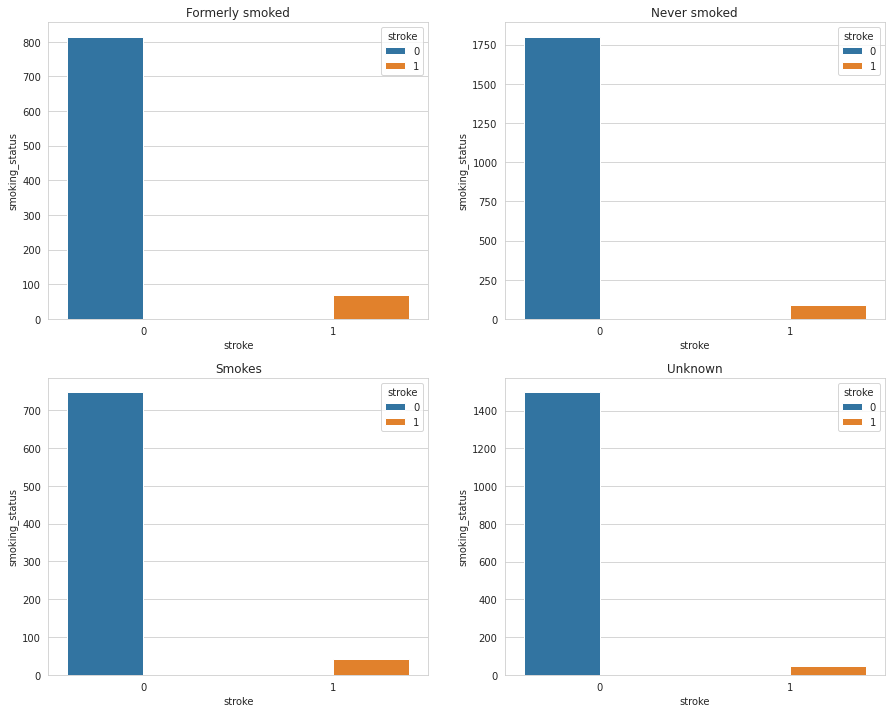

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
plt.title('Formerly smoked')
sns.barplot(x='stroke', y='smoking_status', hue='stroke', data=formerly_smoked)
plt.subplot(2,2,2)
plt.title('Never smoked')
sns.barplot(x='stroke', y='smoking_status', hue='stroke', data=never_smoked)
plt.subplot(2,2,3)
plt.title('Smokes')
sns.barplot(x='stroke', y='smoking_status', hue='stroke', data=smokes)
plt.subplot(2,2,4)
plt.title('Unknown')
sns.barplot(x='stroke', y='smoking_status', hue='stroke', data=unknown)
plt.show()

<Figure size 720x360 with 0 Axes>

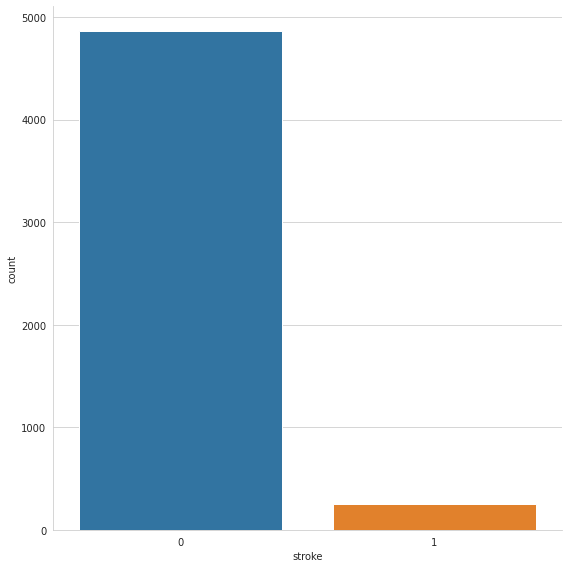

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(data=df, 
            x="stroke", 
            kind='count', height=8)

# Preprocessing

In [ ]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

Menghapus value gender pada kolom gender

In [ ]:
df = df.drop('id', axis=1)

In [ ]:
other_index = df[df['gender'] =='Other'].index
df = df.drop(other_index)

Mengisi Missing Value di BMI menggunakan Rata-Rata

In [ ]:
type_null = pd.DataFrame(df.dtypes).T.rename(index={0:'Type Column'})
type_null2 = pd.DataFrame(df.isnull().sum()).T.rename(index={0:'Amount Null Values'})
type_null3 = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index = {0:'Percentage of Null Values'})
type_null.append([type_null2, type_null3]).T


,Type Column,Amount Null Values,Percentage of Null Values
gender,object,0,0.0
age,float64,0,0.0
hypertension,int64,0,0.0
heart_disease,int64,0,0.0
ever_married,object,0,0.0
work_type,object,0,0.0
Residence_type,object,0,0.0
avg_glucose_level,float64,0,0.0
bmi,float64,201,3.934234
smoking_status,object,0,0.0


In [ ]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

Label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
object_col = [col for col in df.columns if df[col].dtype == 'object']
for col in object_col:
    df[col] = le.fit_transform(df[col])

Melihat jumlah kolom 

In [ ]:
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

?????Membuat features dan taget untuk manchine learning??????

In [ ]:
X = df.drop('stroke', axis=1)
y = df.pop('stroke')

### Spliting our data into training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 20)

print('X_train = ', X_train.shape)
print('X_test = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_test = ', y_test.shape)

X_train =  (3576, 10)
X_test =  (1533, 10)
y_train =  (3576,)
y_test =  (1533,)


Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

Balance data dengan sampling strategi sebanyak 40%

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

oversample = RandomOverSampler(sampling_strategy=0.4) #set your strategy
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(y_train_over))

Counter({0: 3402, 1: 174})
Counter({0: 3402, 1: 1360})


#Modeling

In [ ]:
from sklearn.svm import SVC  
svm = SVC(C=100).fit(X_train_over, y_train_over)

y_pred = svm.predict(X_test)

#model = SVC().fit(x_train, y_train)

#y_pred = model.predict(x_test)



In [ ]:
print('prediksi hasil training :', svm.score(X_train_over, y_train_over))

prediksi hasil training : 0.7870642587148257


#Evaluasi Metrics

In [ ]:
ac = accuracy_score(y_test,y_pred)
con = confusion_matrix(y_test, y_pred)
accuracies = []
accuracies.append(ac)
print("SVC model accuary",ac)
print(con)

SVC model accuary 0.8401826484018264
[[1240  218]
 [  27   48]]


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
print(classification_report(y_test, y_pred))

print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1458
           1       0.18      0.64      0.28        75

    accuracy                           0.84      1533
   macro avg       0.58      0.75      0.60      1533
weighted avg       0.94      0.84      0.88      1533

Accuracy Score:  0.8401826484018264
F1 Score:  0.28152492668621704


In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.840
